In [1]:
import os
from glob import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.listdir('/Users/ybbaek/PycharmProjects/Datasets')

['.DS_Store',
 'data_img',
 '.gitattributes',
 'train',
 'mnist_png',
 'trainLabels.csv',
 '.git']

In [4]:
path_list = glob('//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/*/*.png')

In [6]:
print(path_list[0])

//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/4968.png


In [7]:
def get_label_from_path(path):
    return int(path.split('/')[-2])

In [8]:
path_list[0], get_label_from_path(path_list[0])

('//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/4968.png', 9)

# 이미지 불러오기
1.
2.

In [9]:
image = np.array(Image.open(path_list[0]))

In [11]:
def read_image(path):
    image = np.array(Image.open(path_list[0]))
    return image.reshape(image.shape[0], image.shape[1],1)

In [13]:
class_name = get_label_from_path(path_list[0])

In [14]:
label_name_list = []
for path in path_list:
    label_name_list.append(get_label_from_path(path))

In [15]:
unique_label_names = np.unique(label_name_list)
print(unique_label_names)

[0 1 2 3 4 5 6 7 8 9]


In [25]:
def onehot_encode_label(path):
    onehot_label = unique_label_names == get_label_from_path(path)
    onehot_label = onehot_label.astype(np.uint8)
    return onehot_label

In [26]:
onehot_encode_label(path)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [28]:
read_image(path).shape, onehot_encode_label(path)

((28, 28, 1), array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8))

In [29]:
batch_size = 64
data_height = 28
data_width = 28
channel_n = 1

num_classes = 10

In [32]:
batch_image = np.zeros((batch_size, data_height, data_width, channel_n))
batch_label = np.zeros((batch_size, num_classes))

In [34]:
batch_image.shape, batch_label.shape

((64, 28, 28, 1), (64, 10))

In [145]:
for n, path in enumerate(path_list[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n,:, :, :] = image
    batch_label[n,: ] = onehot_label

//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/4968.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/3791.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/1192.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/3008.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/4015.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/3034.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/7246.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/3587.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/9733.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/7736.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/5135.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/1435.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/9069.png
//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/7044.png
//Users/ybbaek/PycharmProjects/Dat

In [37]:
batch_image

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [38]:
for n, path in enumerate(path_list[:batch_size]):
    image = read_image(path)
    onehot_label = onehot_encode_label(path)
    batch_image[n,:,:,:] = image
    batch_label[n,:] = onehot_label

In [39]:
batch_image.shape, batch_label.shape

((64, 28, 28, 1), (64, 10))

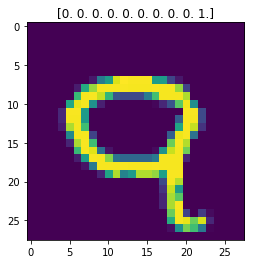

In [41]:
plt.title(batch_label[0])
plt.imshow(batch_image[0,:,:,0])
plt.show()

# Generate Batch data
1.
2.

In [42]:
batch_per_epoch = batch_size // len(path_list)

# Generate batch data with tf.data

In [114]:
import tensorflow as tf

In [131]:
def _read_py_function(path, label):
    image = read_image(path)
    label = np.array(label, dtype=np.uint8)
    return image.astype(np.int32), label

def _resize_function(image_decoded, label):
    image_decoded.set_shape([None, None, None])
    image_resized = tf.image.resize_images(image_decoded, [28,28])
    return image_resized, label

In [132]:
label_list = [onehot_encode_label(path).tolist() for path in path_list]

In [133]:
path_list[0], label_list[0]

('//Users/ybbaek/PycharmProjects/Datasets/mnist_png/testing/9/4968.png',
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [134]:
dataset = tf.data.Dataset.from_tensor_slices((path_list, label_list))
dataset = dataset.map(
    lambda path_list, label_list: tuple(tf.py_func(_read_py_function, [path_list, label_list], 
                                                  [tf.int32, tf.uint8])))

In [135]:
dataset = dataset.map(_resize_function)
dataset = dataset.repeat()
dataset = dataset.shuffle(buffer_size=(int(len(path_list)*0.4)+3*batch_size))
dataset = dataset.batch(batch_size)

In [136]:
iterator = dataset.make_initializable_iterator()
image_stacked, label_stacked = iterator.get_next()

In [137]:
with tf.Session() as sess:
    sess.run(iterator.initializer)
    
    image, label = sess.run([image_stacked, label_stacked])

In [138]:
image.size, image.shape

(50176, (64, 28, 28, 1))

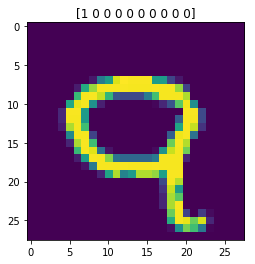

In [144]:
plt.title(label[5])
plt.imshow(image[5, :, :, 0 ])
plt.show()

In [102]:
image_stacked

<tf.Tensor 'IteratorGetNext_1:0' shape=(28, 28, ?) dtype=float32>

In [103]:
image.shape, label.shape

((28, 28, 1), (10,))